In [17]:
import numpy as np
import matplotlib.pyplot as plt

In [18]:
upper_x2 = np.random.uniform(0, 1, 3)
lower_x2 = np.random.uniform(-1, 0, 3)
data = np.append(lower_x2, upper_x2)
x1 = np.random.uniform(-1, 1, 6)

smallest_upper = np.min(upper_x2)
largest_lower = np.max(lower_x2)

a_svm = (smallest_upper + largest_lower) / 2
a_rand = np.random.uniform(largest_lower, smallest_upper, 1)[0]
print("a_svm: ", a_svm)
print("a_rand: ", a_rand)

rand_pred = []
svm_pred = []
rand_vals = []
svm_vals = []
for x2 in data:
  rand_value = x2 - a_rand
  svm_value = x2 - a_svm
  rand_vals = np.append(rand_vals, rand_value)
  svm_vals = np.append(svm_vals, svm_value)
  rand_sign = np.sign(rand_value)
  svm_sign = np.sign(svm_value)

  rand_pred = np.append(rand_pred, rand_sign)
  svm_pred = np.append(svm_pred, svm_sign)

a_svm:  0.23155424513336698
a_rand:  0.28992649498479467


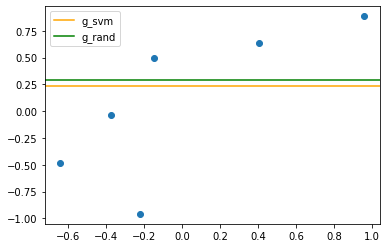

In [19]:
plt.scatter(x1, data)
svm = plt.axhline(a_svm, color="orange")
rand = plt.axhline(a_rand, color="green")
plt.legend((svm, rand), ('g_svm', 'g_rand'))
plt.show()

In [20]:
iters = 1000000

a_rand_vals = []
a_svm_vals = []

for i in range(iters):
  upper_x2 = np.random.uniform(0, 1, 3)
  lower_x2 = np.random.uniform(-1, 0, 3)
  data = np.append(lower_x2, upper_x2)
  x1 = np.random.uniform(-1, 1, 6)

  smallest_upper = np.min(upper_x2)
  largest_lower = np.max(lower_x2)

  a_svm = (smallest_upper + largest_lower) / 2
  a_rand = np.random.uniform(largest_lower, smallest_upper, 1)[0]
  a_rand_vals.append(a_rand)
  a_svm_vals.append(a_svm)

In [25]:
a_rand_vals = np.array(a_rand_vals)
a_svm_vals = np.array(a_svm_vals)

a_rand_bar = np.mean(a_rand_vals)
a_svm_bar = np.mean(a_svm_vals)

a_rand_biases = []
a_svm_biases = []

for a in a_rand_vals:
  a_norm = a - a_rand_bar
  a_bias = a_norm**2
  a_rand_biases.append(a_bias)

for a in a_svm_vals:
  a_norm = a - a_svm_bar
  a_bias = a_norm**2
  a_svm_biases.append(a_bias)

a_rand_biases = np.array(a_rand_biases)
a_svm_biases = np.array(a_svm_biases)

a_rand_bias = np.mean(a_rand_biases)
a_svm_bias = np.mean(a_svm_biases)

print(a_rand_bias)
print(a_svm_bias)

0.04585458217407696
0.01877108699997467


In [28]:


rand_var = np.var(a_rand_vals)
svm_var = np.var(a_svm_vals)

# true value is 0, horizontal line at 0 splits data into lower and upper

# bias is mean squared (according to Gustavo's Piazza post)

# taking the mean of a_rand and a_svm values is the same as finding the
# average difference between prediction of the target value and the actual value
# because true here is 0.

# rand_bias = np.mean(a_rand_vals)**2
# svm_bias = np.mean(a_svm_vals)**2

rand_bias_vals = []
for a in a_rand_vals:
  bias = a - 0
  rand_bias_vals.append(bias)

svm_bias_vals = []
for a in a_svm_vals:
  bias = a - 0
  svm_bias_vals.append(bias)

rand_bias = np.mean(rand_bias_vals)**2
svm_bias = np.mean(svm_bias_vals)**2

print("random variance: ", rand_var)
print("svm variance: ", svm_var)
print("random bias: ", rand_bias)
print("svm bias: ", svm_bias)

random variance:  0.04585458217407696
svm variance:  0.01877108699997467
random bias:  7.983644094706825e-08
svm bias:  7.740680711734787e-08


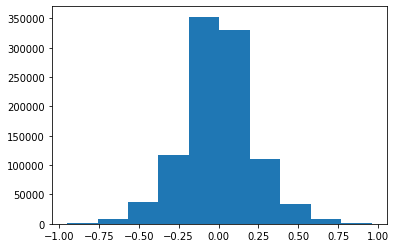

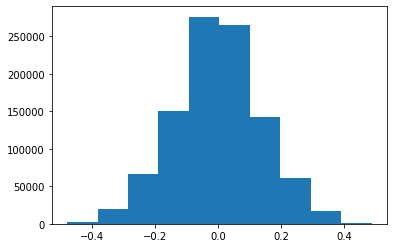

In [29]:
plt.hist(a_rand_vals)
plt.show()
plt.hist(a_svm_vals)
plt.show()